In [1]:
#Impoting Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
gas= pd.read_csv('gas_turbines.csv')
gas.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

## EDA

In [3]:
gas.shape

(15039, 11)

In [4]:
#Information of dataset
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
# check any null vaues is there in data set
gas.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [6]:
# descriptive statistics
gas.describe().T

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

In [7]:
# check any duplicated values is there in dataset
gas.duplicated().sum()

0

In [8]:
# check which variable is highly correlated with target variable
gas.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [9]:
numerical_features=gas.describe(include=['int64','float64']).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

## Data Visualization

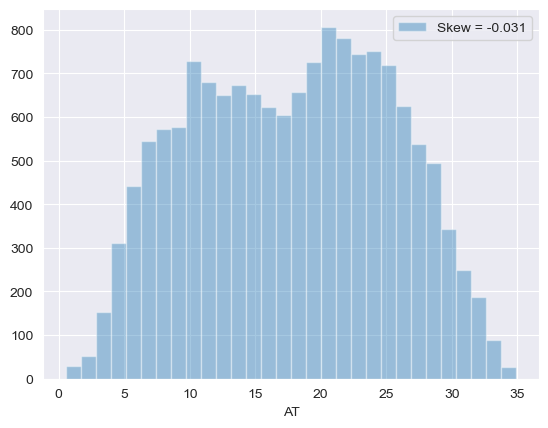

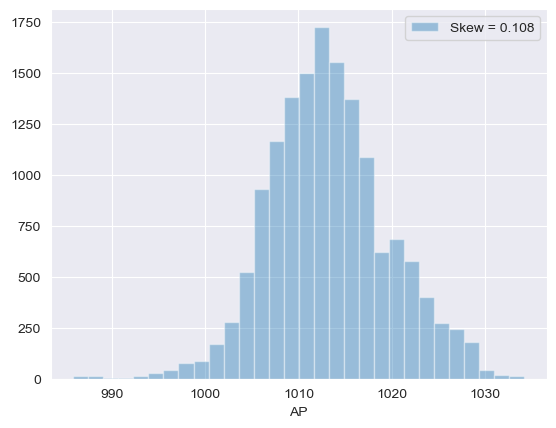

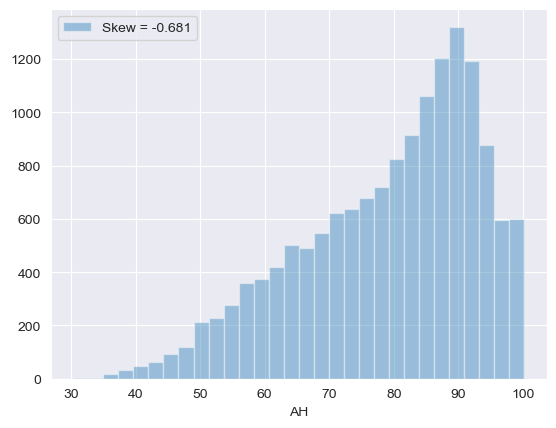

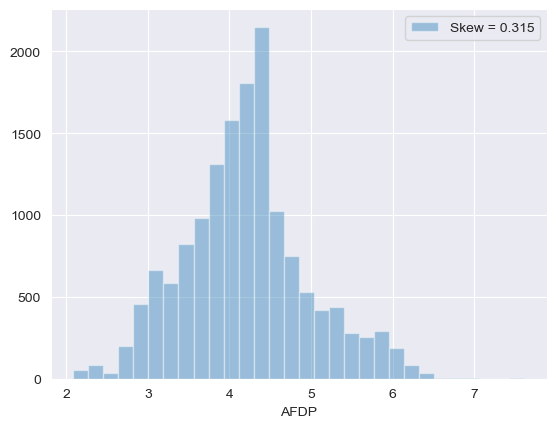

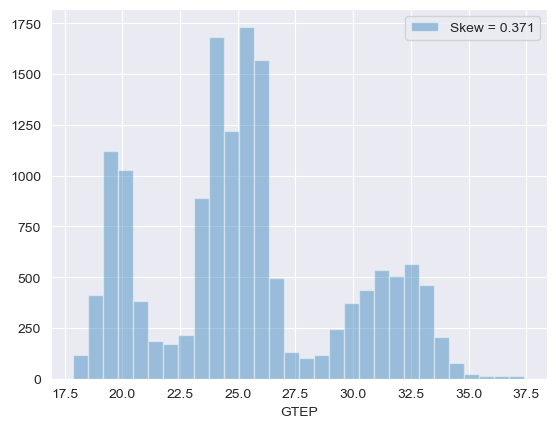

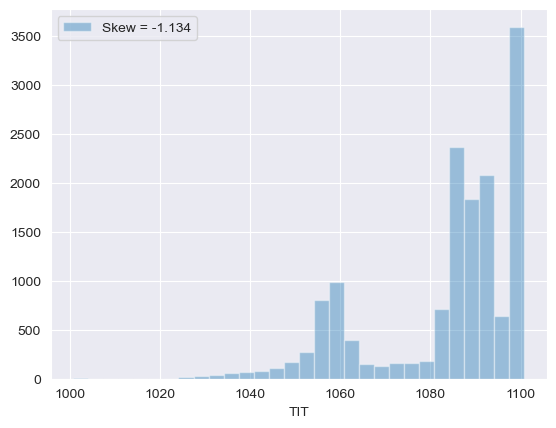

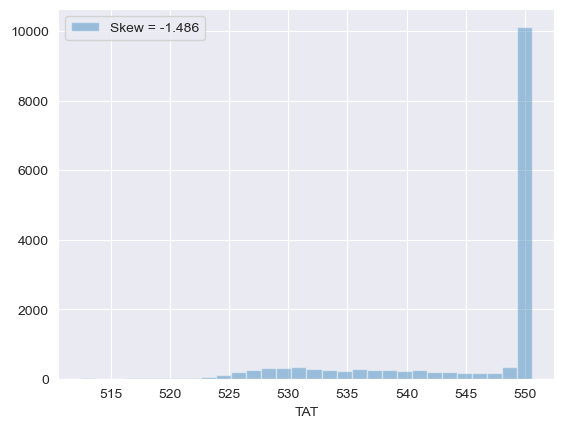

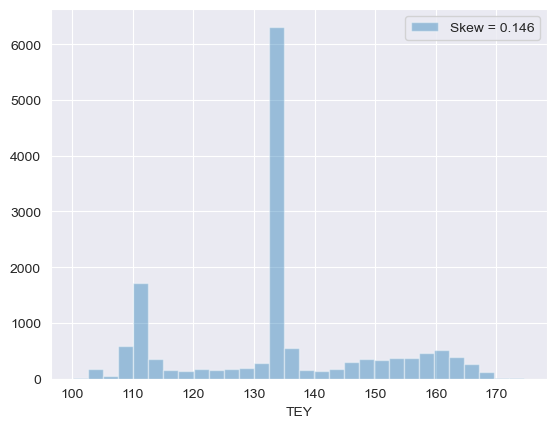

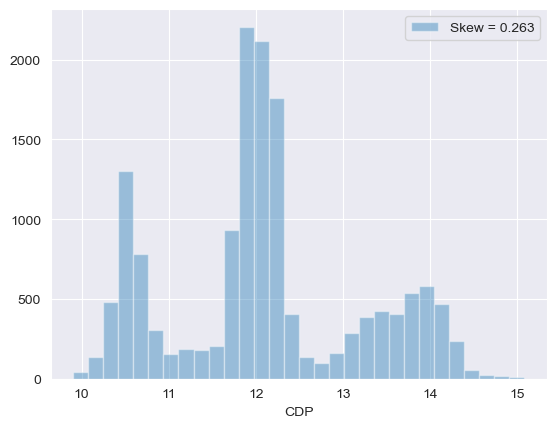

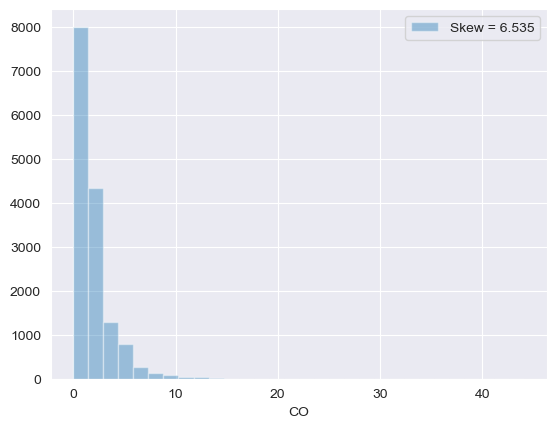

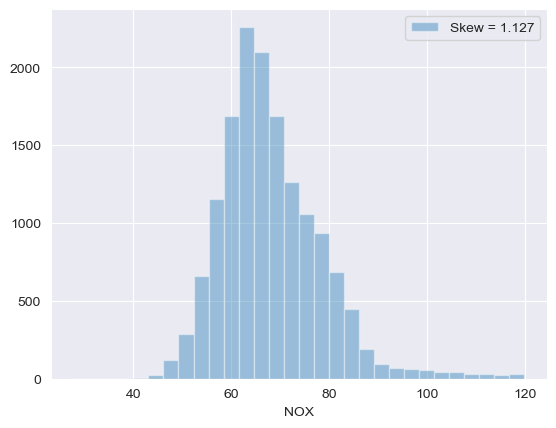

In [10]:
for feat in numerical_features:
    sns.set_style(style='darkgrid')
    skew = gas[feat].skew()
    sns.distplot(gas[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

## Treating outliers

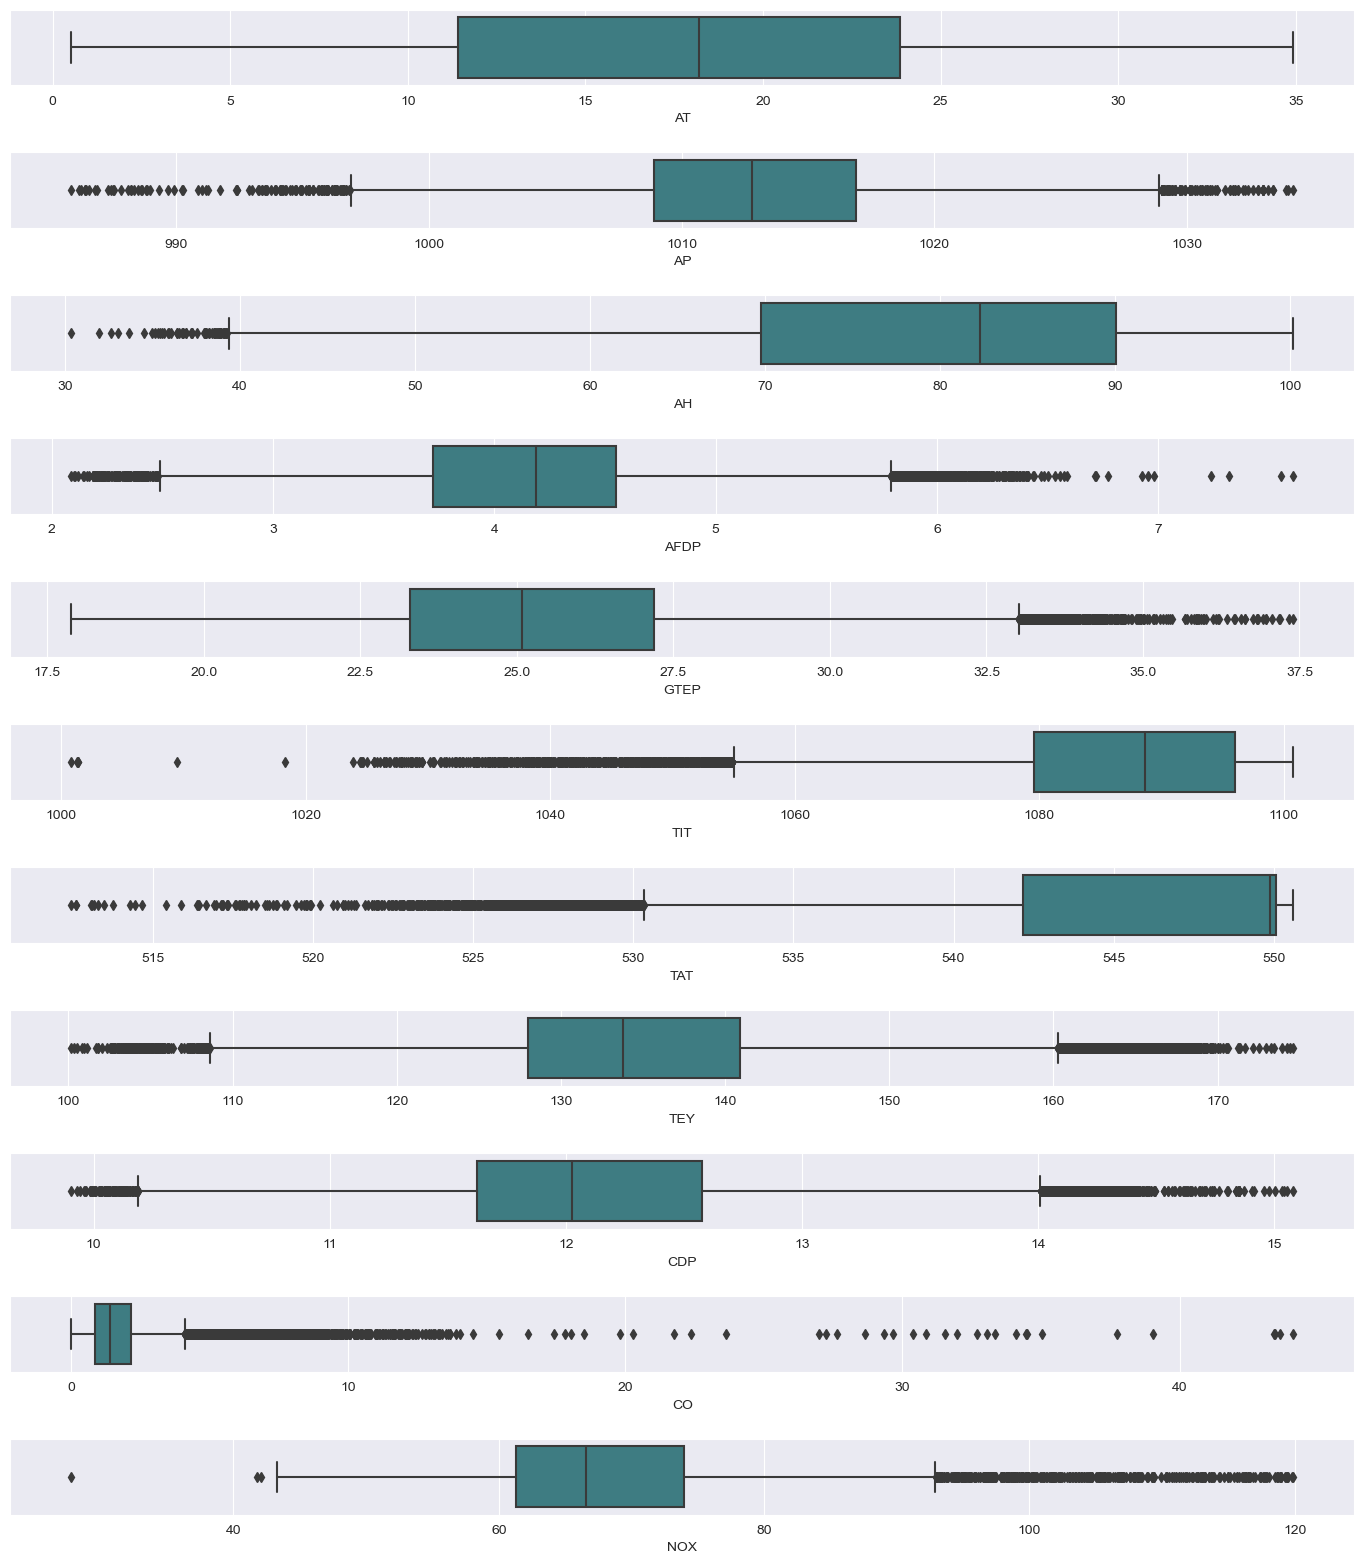

In [11]:
# plotting boxplot for each variables
df=gas.copy()
ot=df.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<Axes: >

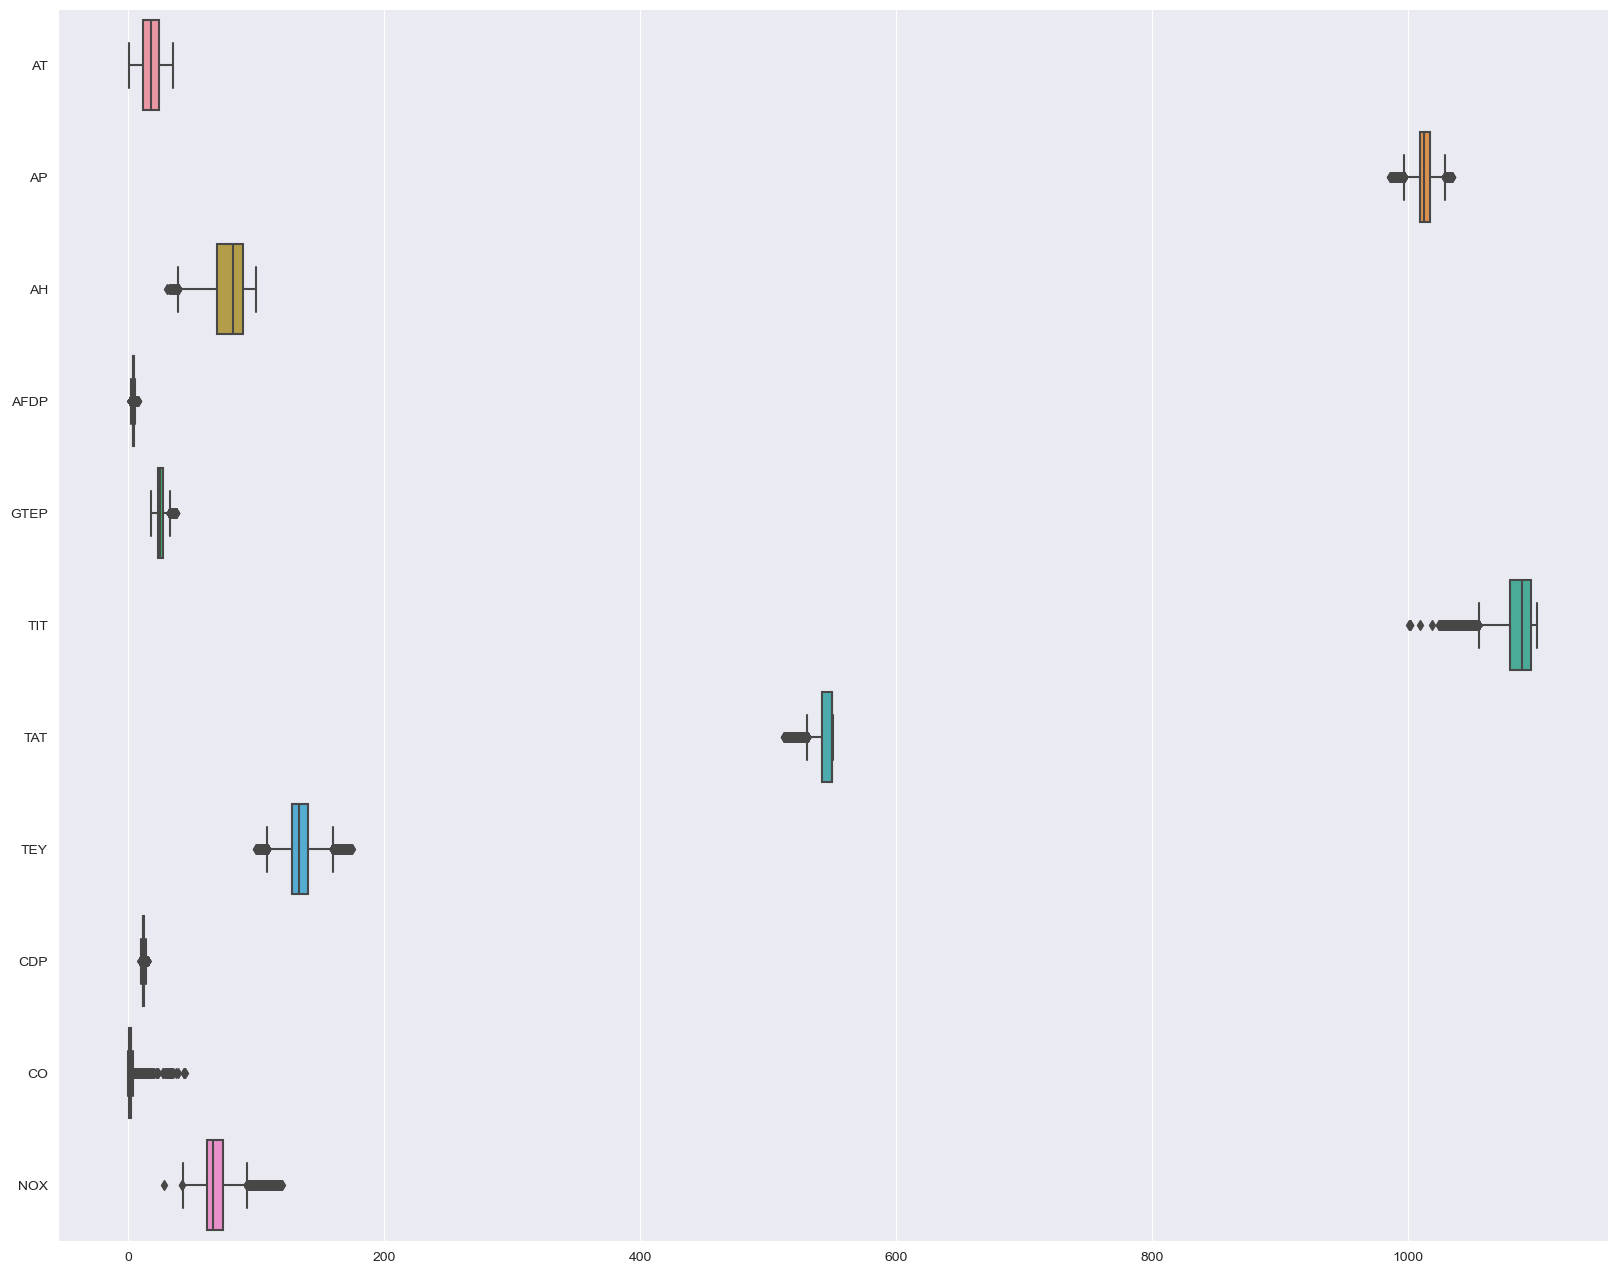

In [12]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

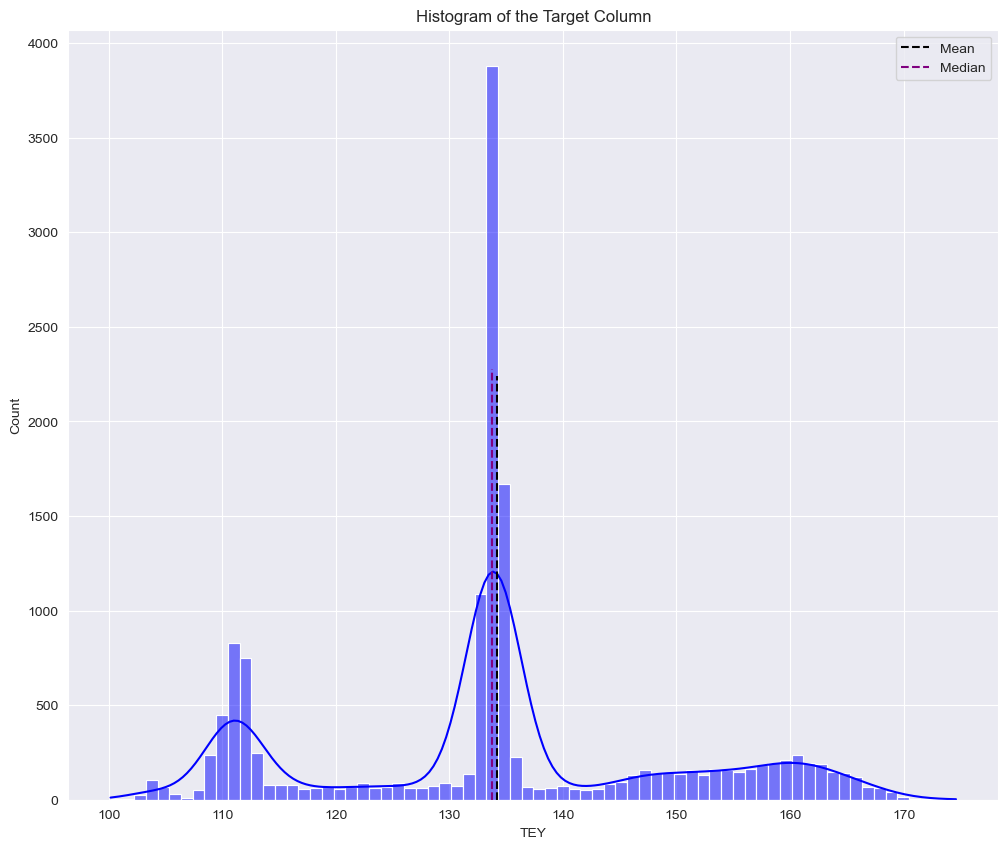

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="blue",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="black",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

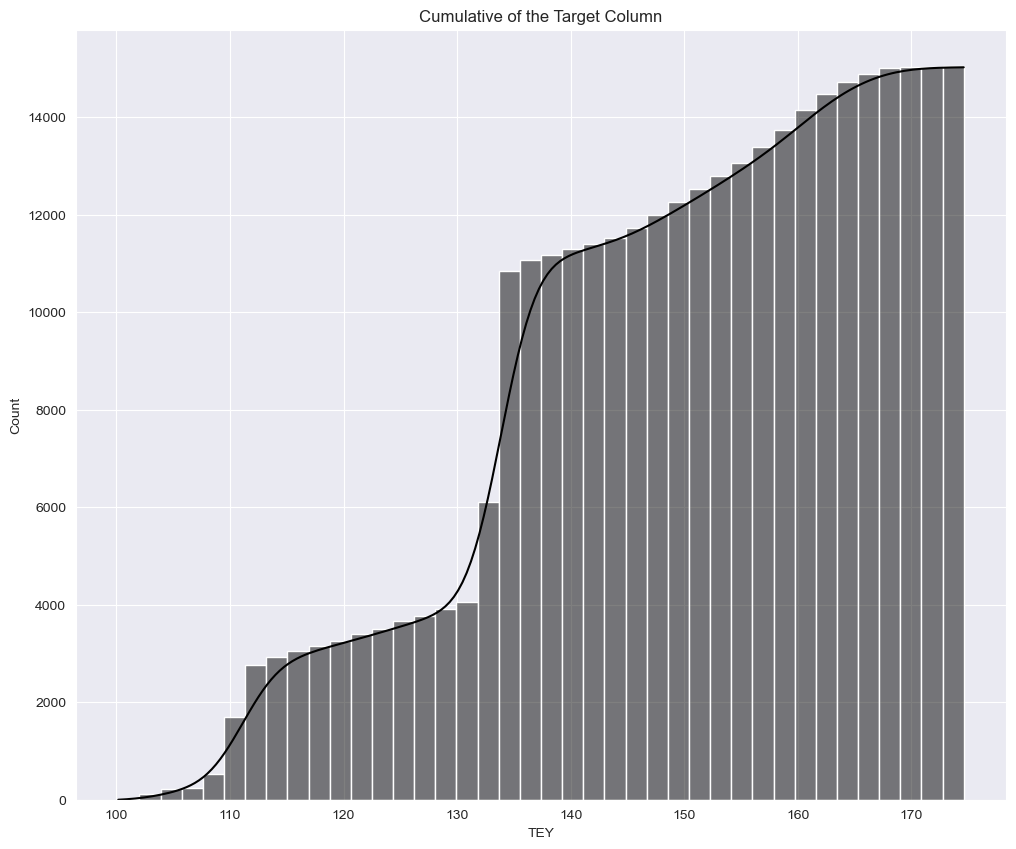

In [14]:
plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="black",cumulative=True)
plt.title("Cumulative of the Target Column")

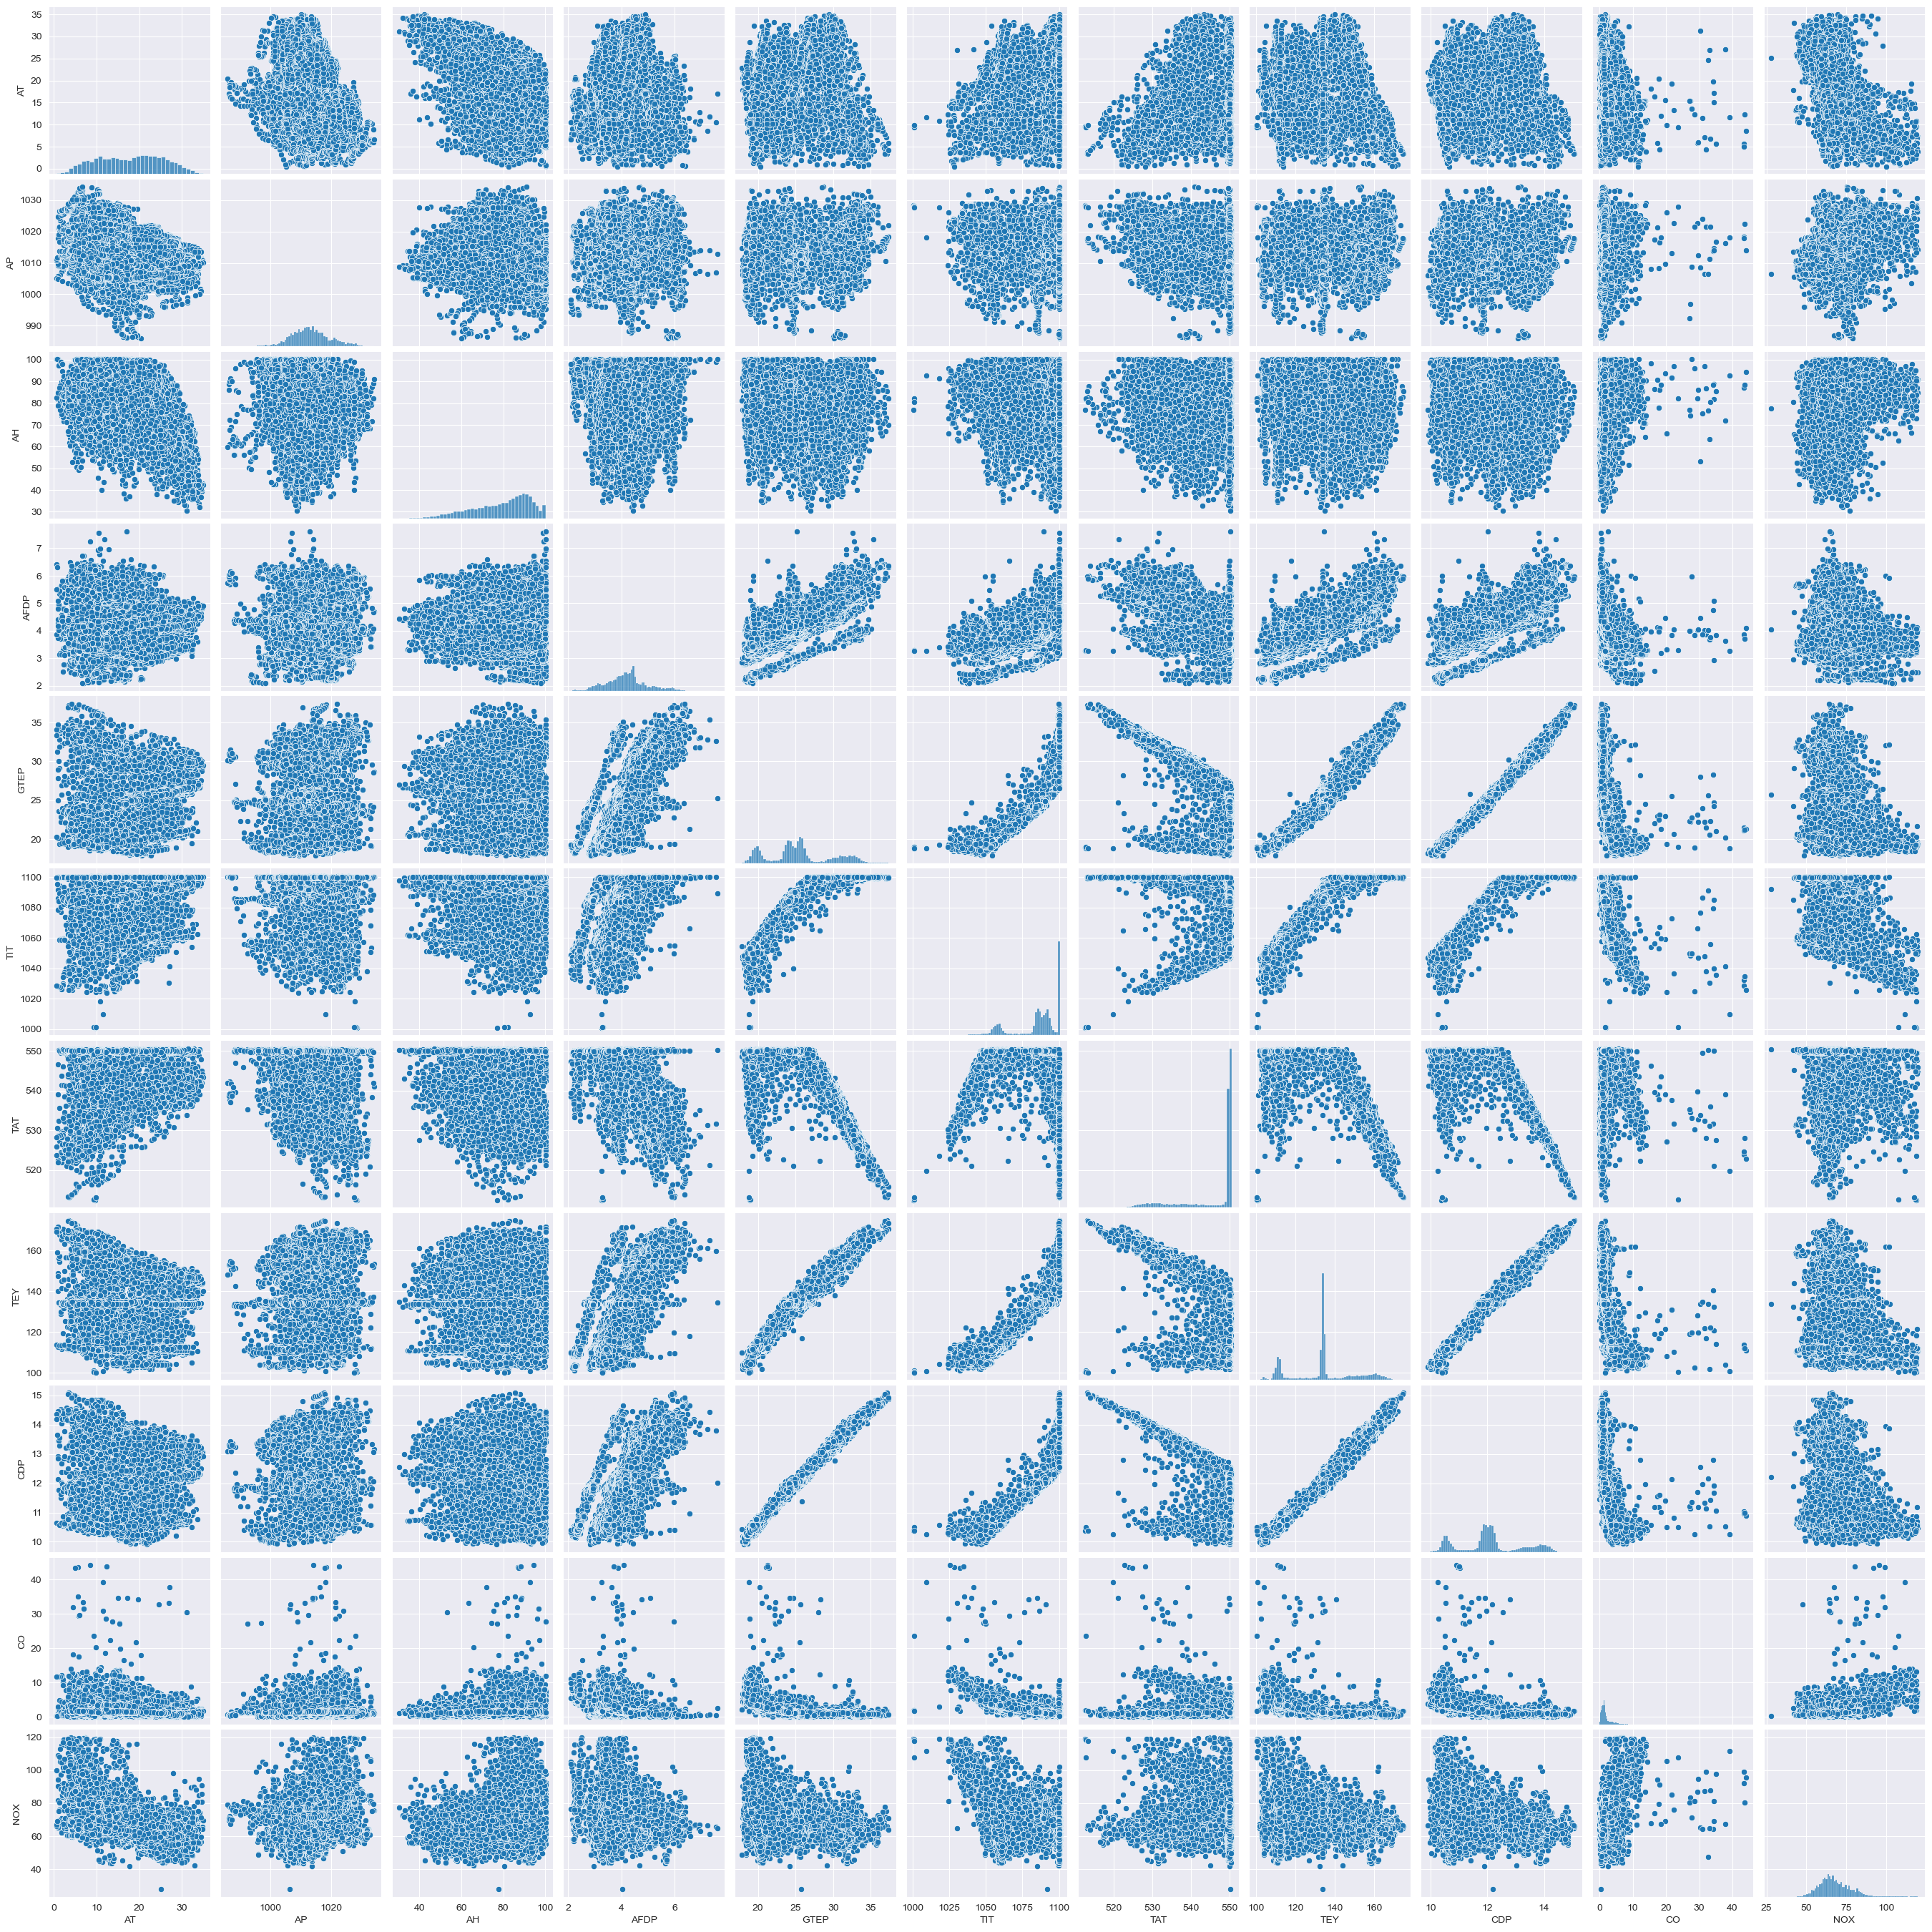

In [15]:
sns.pairplot(df)

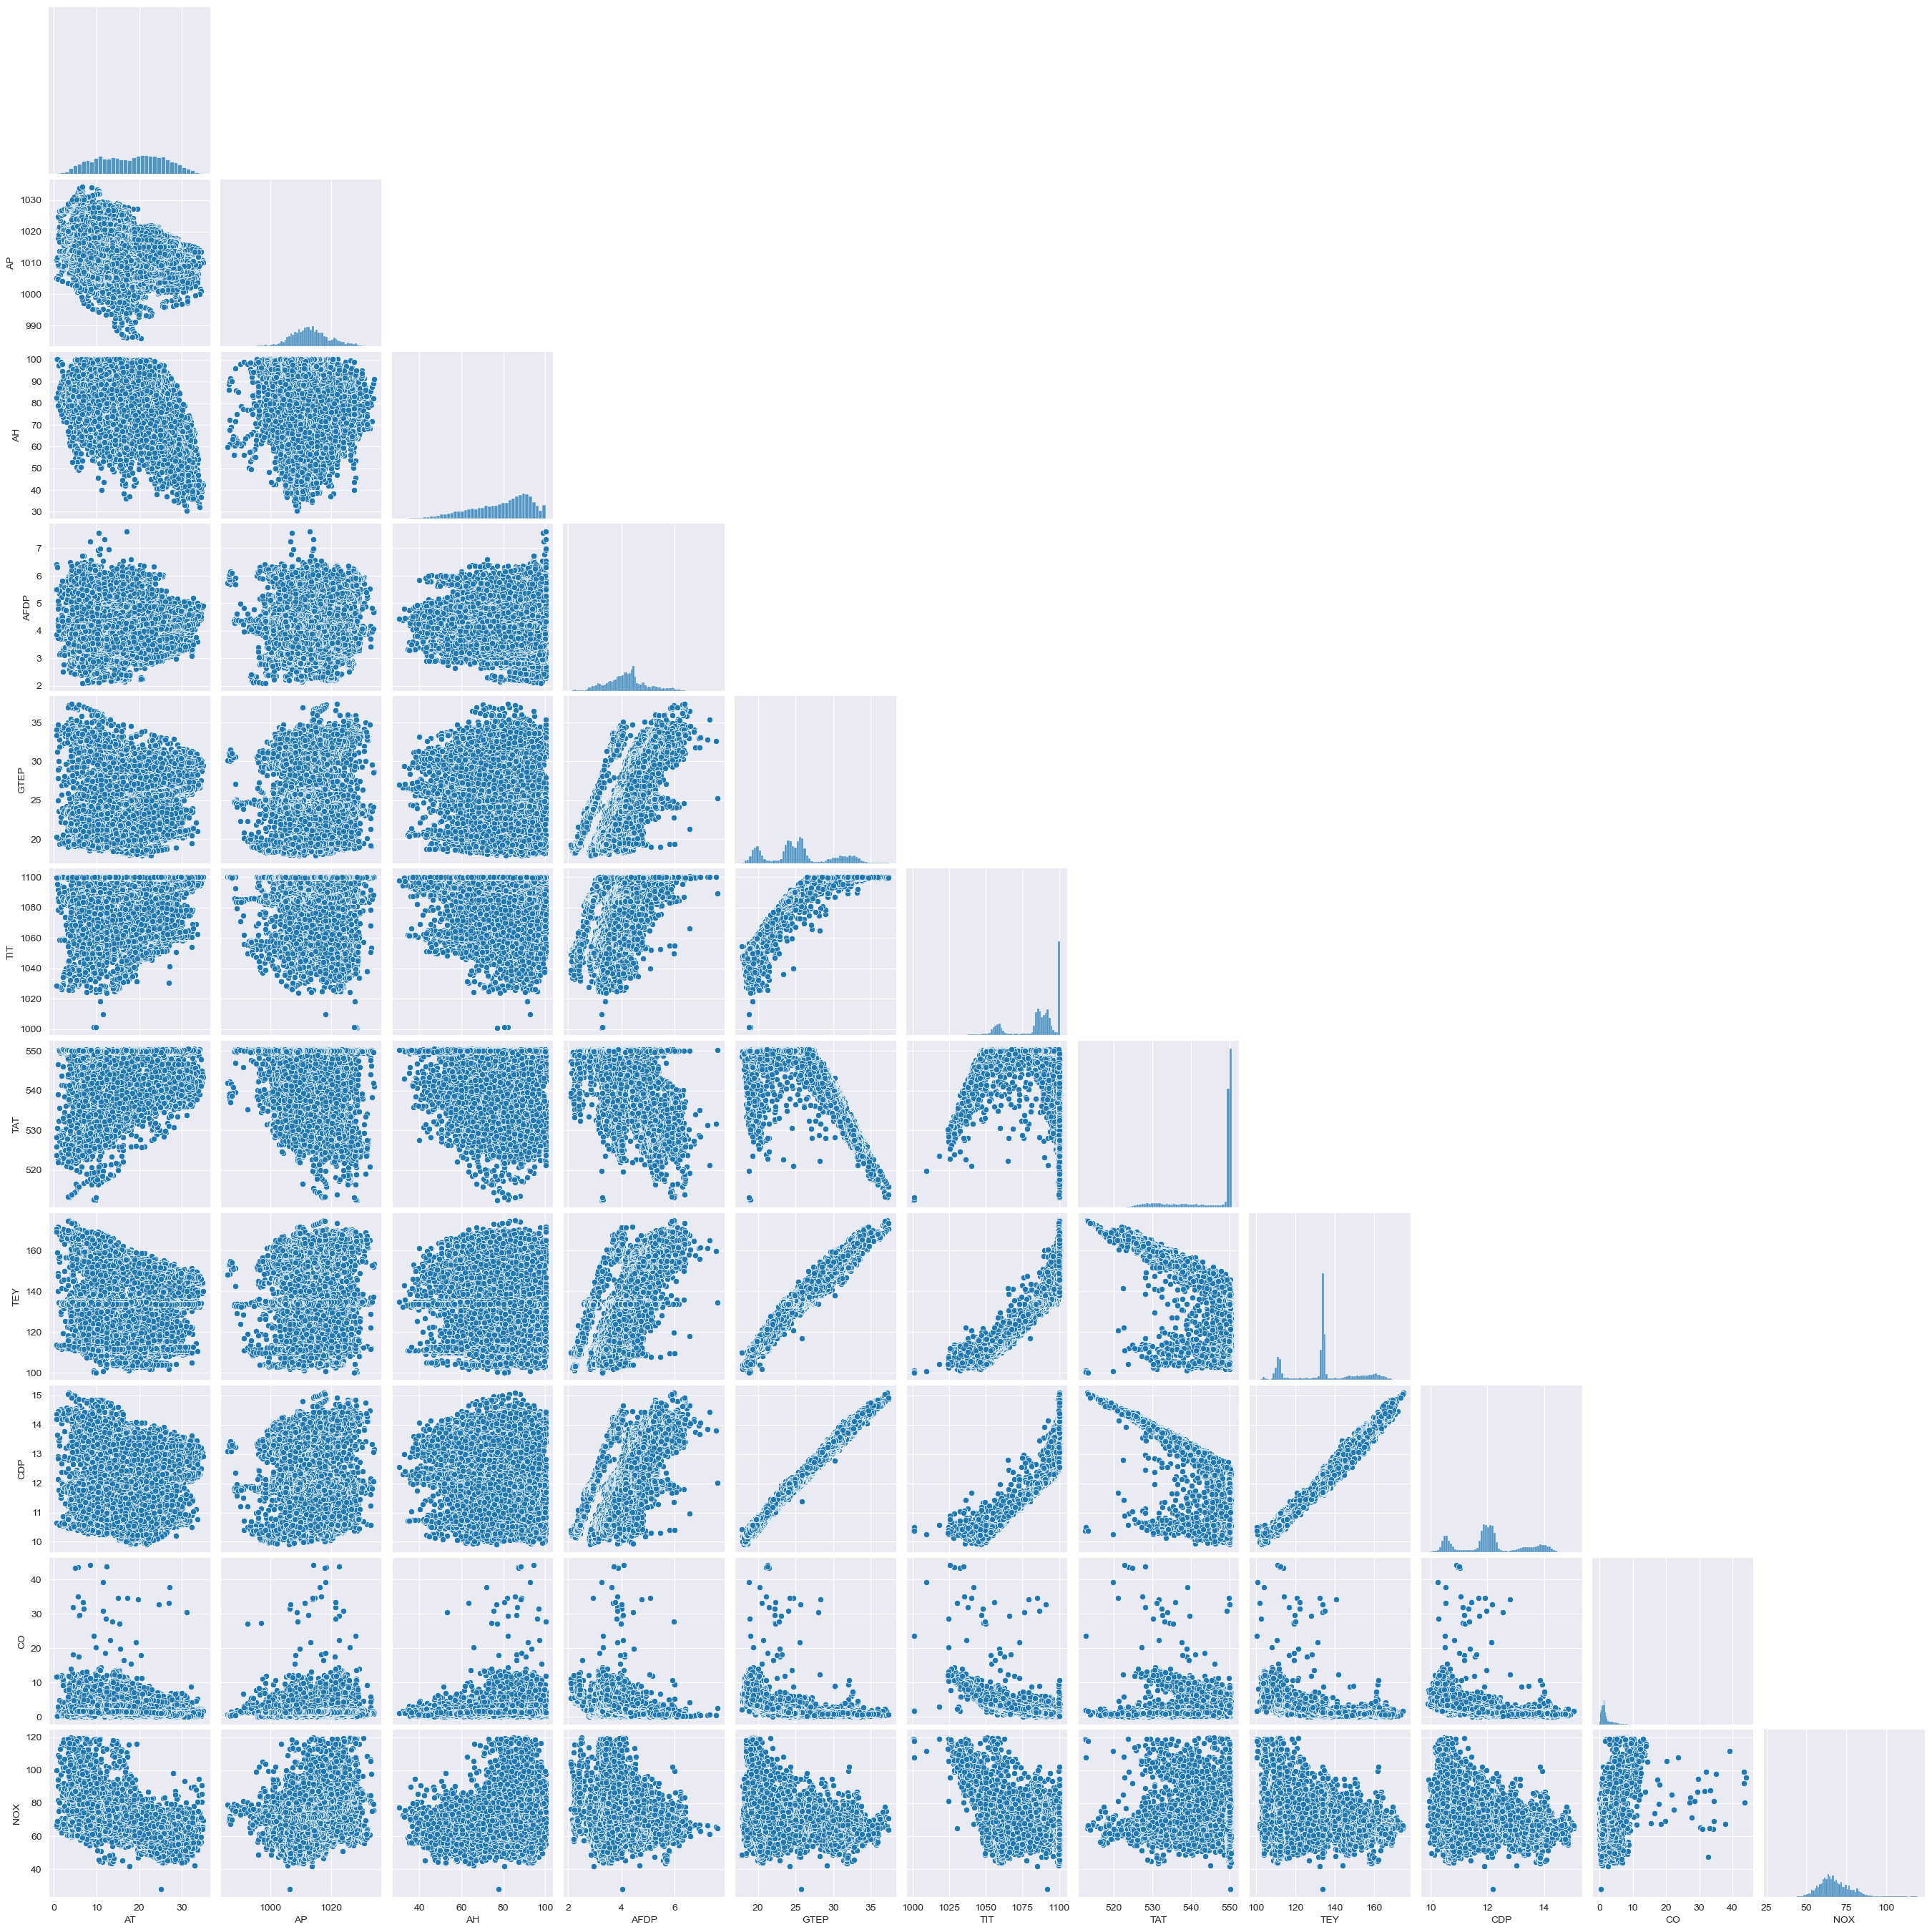

In [16]:
sns.pairplot(df,corner=True)

<Axes: >

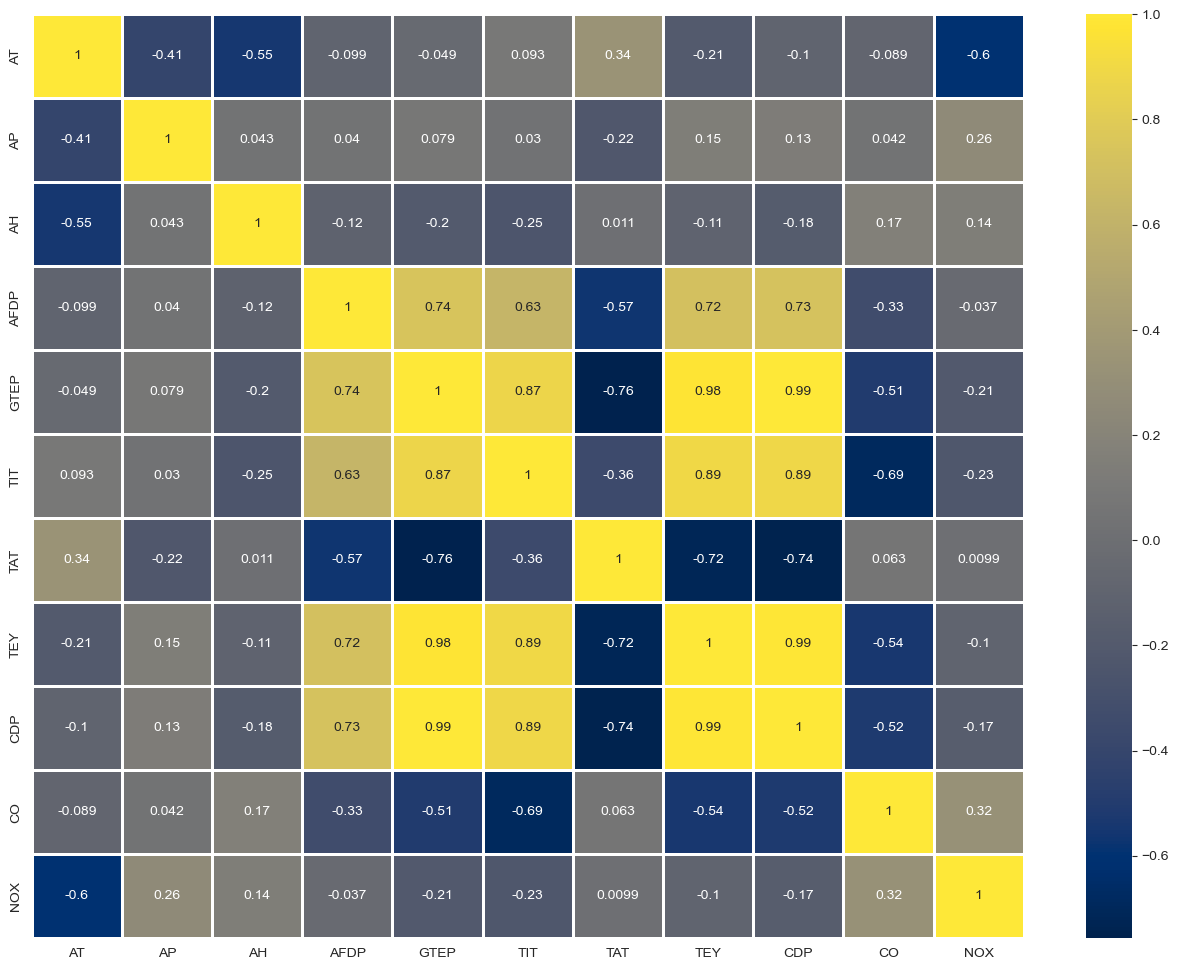

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(), cmap="cividis", annot=True,linewidths=1, linecolor='white')

<Axes: xlabel='GTEP', ylabel='CDP'>

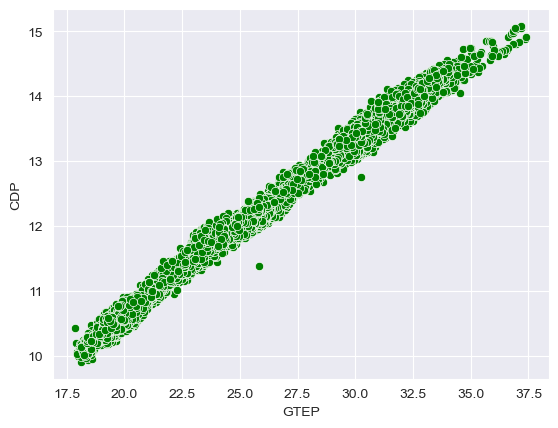

In [18]:
#plot the highly correlated two feature variables
sns.scatterplot(data=df,x='GTEP',y='CDP',color='green')

In [19]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

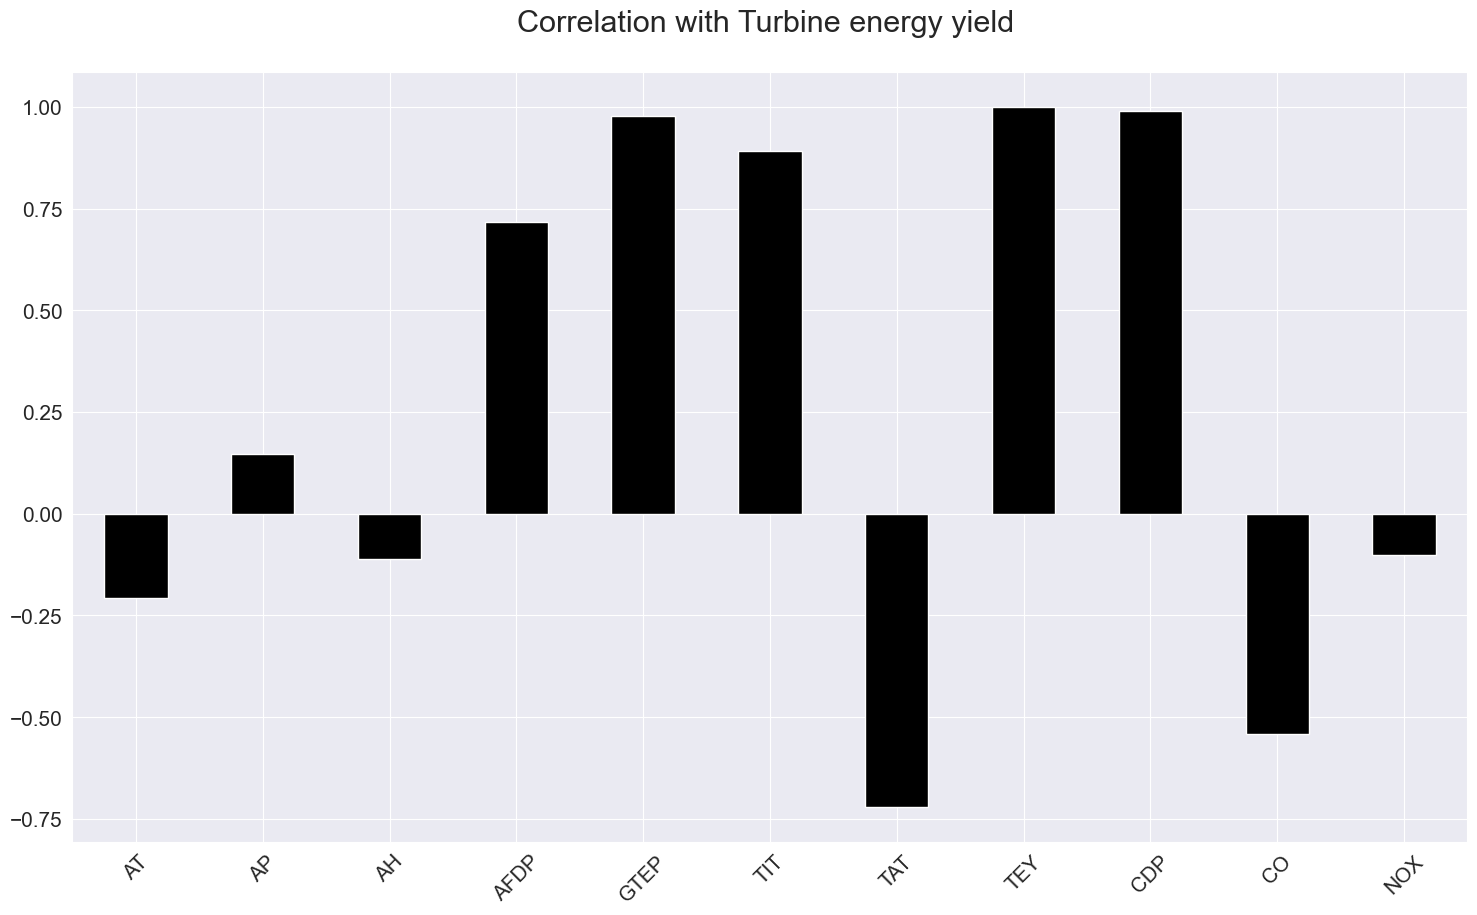

In [20]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'black',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

## Data pre-processing

In [21]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()


CDP    GTEP     TIT     TAT    AFDP      CO      AT     TEY
0  10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1  10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2  10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3  10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4  10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978  114.72

In [22]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [23]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

CDP      GTEP       TIT       TAT      AFDP        CO        AT  \
0 -1.357331 -1.379101 -1.488376  0.585240 -0.921232  0.532012 -1.439778   
1 -1.363676 -1.363528 -1.482325  0.585240 -0.921495  0.568733 -1.449601   
2 -1.360957 -1.351309 -1.476275  0.568715 -0.944385  0.552938 -1.434721   
3 -1.356424 -1.348194 -1.464173  0.583969 -0.946884  0.548933 -1.413702   
4 -1.350985 -1.354663 -1.458123  0.582698 -0.924389  0.574179 -1.368693   

        TEY  
0 -1.231172  
1 -1.229909  
2 -1.230541  
3 -1.229909  
4 -1.229909

In [24]:
features = model_data.drop('TEY', axis=1)
target = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(features,target, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) 
x_test_scaled  = scaler_test.fit_transform(x_test) 

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [25]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  ,activation='linear', kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
history=model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 1s 4ms/step - loss: 17602.1445 - mae: 131.7134 - mse: 17602.1445 - val_loss: 16742.7148 - val_mae: 128.4321 - val_mse: 16742.7148
Epoch 2/100
169/169 [==============================] - 0s 3ms/step - loss: 16246.5762 - mae: 126.4658 - mse: 16246.5742 - val_loss: 15690.5166 - val_mae: 124.2680 - val_mse: 15690.5176
Epoch 3/100
169/169 [==============================] - 1s 5ms/step - loss: 15272.6250 - mae: 122.5532 - mse: 15272.6250 - val_loss: 14773.6729 - val_mae: 120.5226 - val_mse: 14773.6729
Epoch 4/100
169/169 [==============================] - 1s 5ms/step - loss: 14389.6523 - mae: 118.8969 - mse: 14389.6523 - val_loss: 13922.7441 - val_mae: 116.9391 - val_mse: 13922.7441
Epoch 5/100
169/169 [==============================] - 1s 5ms/step - loss: 13562.4014 - mae: 115.3653 - mse: 13562.4014 - val_loss: 13120.2939 - val_mae: 113.4562 - val_mse: 13120.2939
Epoch 6/100
169/169 [==============================] - 1s 3ms/step - loss: 

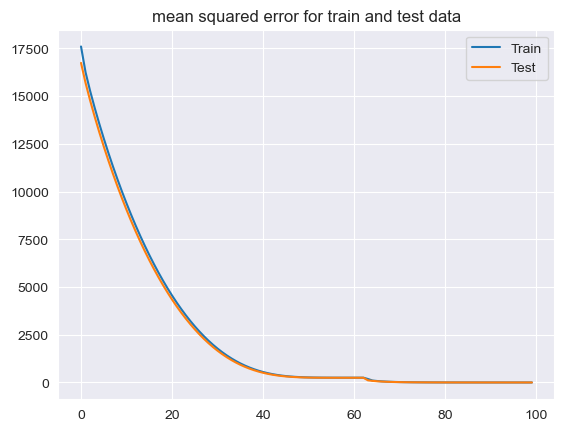

In [26]:
# mean squared error 
plt.plot(range(100),history.history['mse'],label='Train')
plt.plot(range(100),history.history['val_mse'],label='Test')
plt.title('mean squared error for train and test data')
plt.legend()

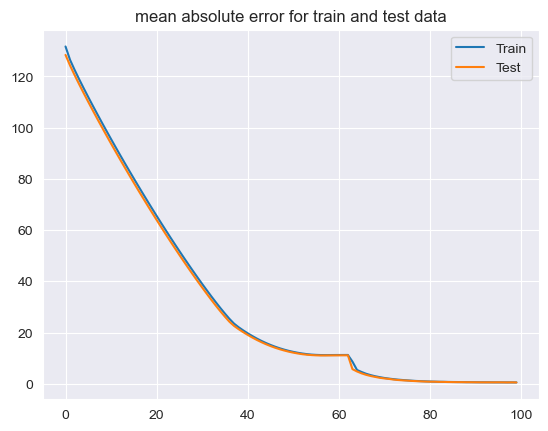

In [27]:
plt.plot(range(100),history.history['mae'],label='Train')
plt.plot(range(100),history.history['val_mae'],label='Test')
plt.title('mean absolute error for train and test data')
plt.legend()

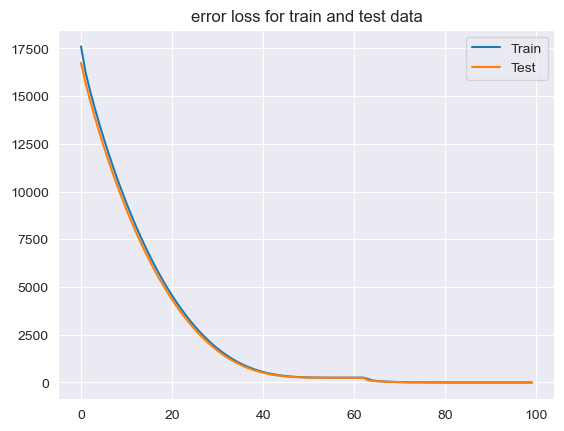

In [28]:
plt.plot(range(100),history.history['loss'],label='Train')
plt.plot(range(100),history.history['val_loss'],label='Test')
plt.title('error loss for train and test data')
plt.legend()

In [29]:
# predicting
pred=model.predict(x_test_scaled)

94/94 [==============================] - 0s 4ms/step


In [30]:
pred1=pd.DataFrame(pred,columns=['pred_values'])

In [31]:
r2_score(y_test,pred)

0.9975572682495543

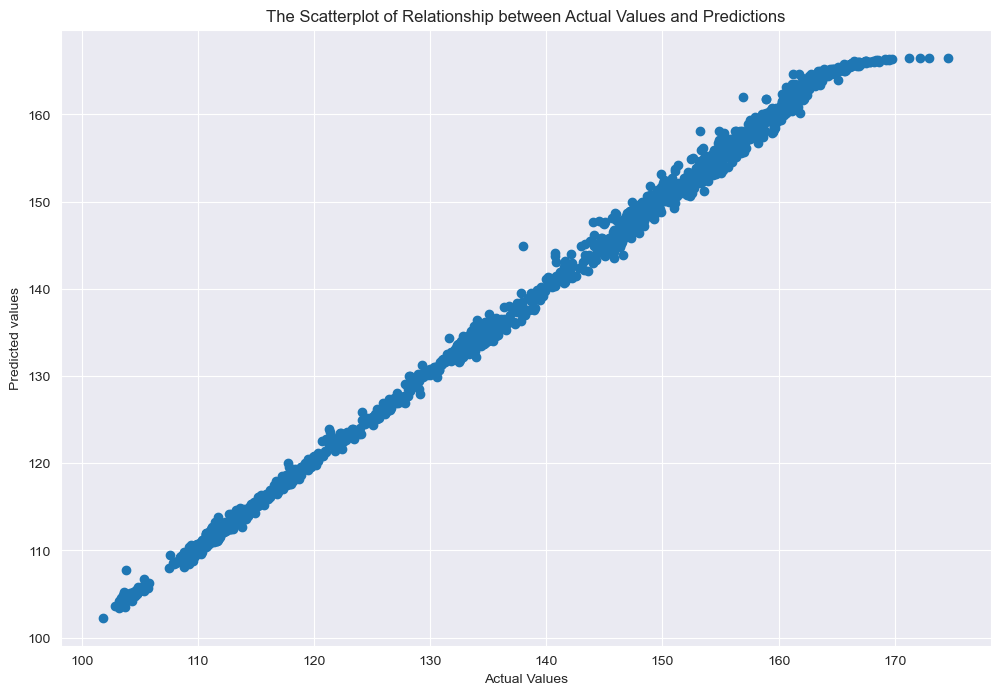

In [32]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(y_test, pred)

In [33]:
y_test['pred_values']=pred
y_test

TEY  pred_values
13312  134.46   134.638504
12627  111.88   112.857529
6393   133.72   134.297836
4990   133.79   133.910355
12462  110.77   111.194656
...       ...          ...
11478  119.25   120.033218
12302  133.74   133.932022
13093  146.31   146.350479
2699   150.07   150.108688
12506  111.77   111.675873

[3008 rows x 2 columns]